In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-02 12:48:05.648162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 12:48:05.648287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 12:48:05.807240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 3

In [10]:
def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

In [11]:
def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [12]:
data_dir = '/kaggle/input/leapgestrecog'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [13]:
num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

In [14]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/3
   3/1000 ━━━━━━━━━━━━━━━━━━━━ 1:03 64ms/step - accuracy: 0.4948 - loss: 0.8369 

W0000 00:00:1712062465.070906     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 999/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4921 - loss: 0.6984

W0000 00:00:1712062564.137001     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 136s 132ms/step - accuracy: 0.4921 - loss: 0.6984 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 126s 126ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 126s 125ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [15]:
model.save('hand_gesture_model.h5')

In [16]:
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

In [17]:
model = tf.keras.models.load_model('hand_gesture_model.h5')

In [27]:
def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

In [19]:
image_path_to_predict = '/kaggle/input/leapgestrecog/leapgestrecog/leapGestRecog/01/03_fist/frame_01_03_0077.png'

In [20]:
predicted_gesture = predict_hand_gesture(image_path_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


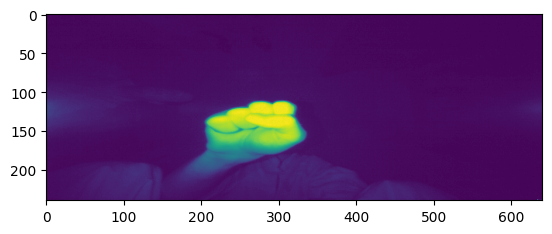

The predicted hand gesture is: leapGestRecog


In [21]:
img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


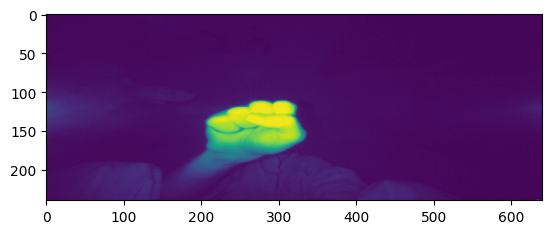

The predicted hand gesture is: leapGestRecog


In [22]:
image_path_to_predict = '/kaggle/input/leapgestrecog/leapgestrecog/leapGestRecog/01/03_fist/frame_01_03_0162.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


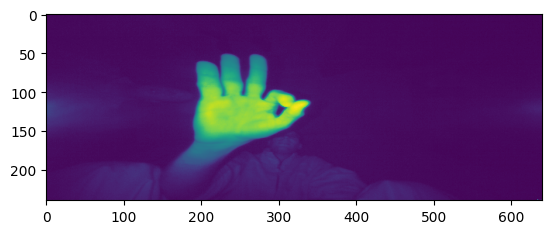

The predicted hand gesture is: leapGestRecog


In [30]:
image_path_to_predict = '/kaggle/input/leapgestrecog/leapGestRecog/01/07_ok/frame_01_07_0002.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


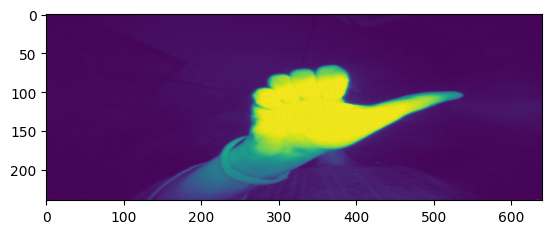

The predicted hand gesture is: leapGestRecog


In [31]:
image_path_to_predict = '/kaggle/input/leapgestrecog/leapGestRecog/09/05_thumb/frame_09_05_0002.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")